# Data-Oriented Plasticity

Demonstration of training and application of machine learning (ML) flow rule for different microstructures. The <a rel="article" href="https://www.mdpi.com/1996-1944/13/7/1600#">scientific background</a> of this work is described in the open access article A. Hartmaier "Data-Oriented Constitutive Modeling of Plasticity in Metals" *Materials* 2020, 13(7), 1600.

### Dependencies:
 - [pyLabFEA](https://github.com/AHartmaier/pyLabFEA.git) for data-oriented material definitions and Finite Element Analysis (FEA)
 - [NumPy](http://numpy.scipy.org) for array handling
 - [Scipy](https://www.scipy.org/) for numerical solutions
 - [scikit-learn](https://scikit-learn.org/stable/) for machine learning algorithms
 - [MatPlotLib](https://matplotlib.org/) for graphical output
 - [pandas](https://pandas.pydata.org/) for data import

Author: Alexander Hartmaier, ICAMS, Ruhr-Universtität Bochum, June 2020

This work is licensed under a Creative 
Commons Attribution-NonCommercial-ShareAlike 4.0 International License
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">(CC-BY-NC-SA)</a>
 <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
<img alt="Creative Commons License" style="border-width:0;max-heigt:9px;height:100%;" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>

## 1. Define Materials from Data Sets

Read input data produced from micromechanical simulations from data repository.

***Shapes (38898, 6)

*** Microstructure: texture5 ***
38898  data points imported into database  Random
Data for flow stresses at various plastic strains imported.
Texture  100%_Random with texture parameter:  0.0
Number of load cases:  359 ; initially:  4580
Estimated elasic constants: E=150.27 GPa, nu=0.30
Estimated yield strength: 44.97 MPa, from 4580 data sets with PEEQ approx. 0.002


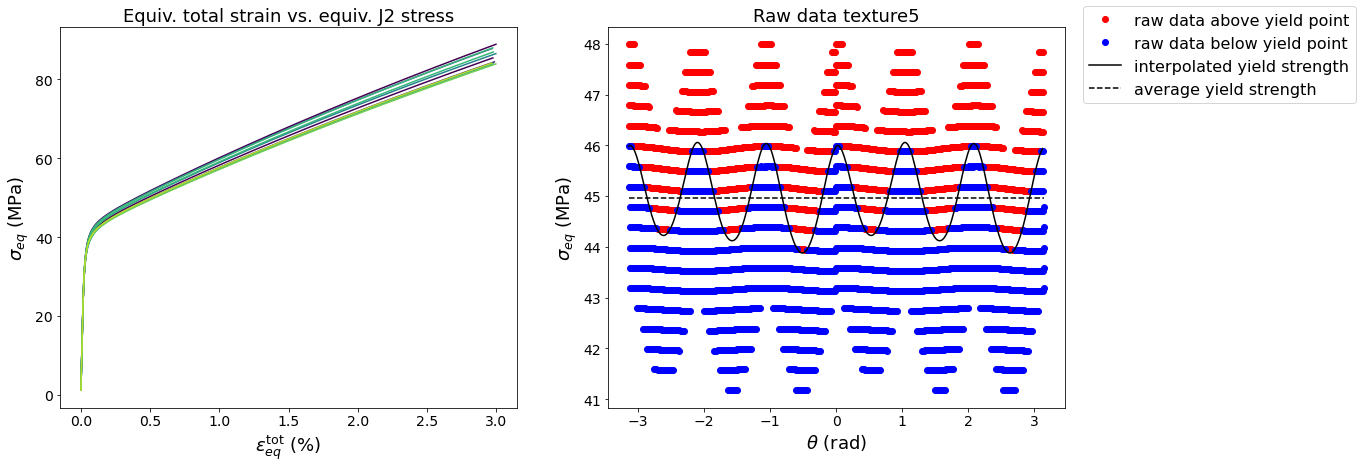


###   Data set "Random"  ###
Type of microstructure:  Random
Imported 1 data sets for textures, with 4 hardening stages and 358 load cases each.
Averaged properties : E_av=150.27 GPa, nu_av=0.30, sy_av=44.97 MPa
{'ms_type': 'Random', 'Npl': 4, 'Nlc': 358, 'Ntext': 1, 'texture': array([0.]), 'tx_name': ['100%_Random'], 'peeq_max': 0.027353499037006956, 'epc': 0.002, 'work_hard': array([0.002     , 0.01045117, 0.01890233, 0.0273535 ])}
***Shapes (33685, 6)

*** Microstructure: texture6 ***
33685  data points imported into database  Goss
Data for flow stresses at various plastic strains imported.
Texture  100%_Goss with texture parameter:  1.0
*** Warning: Large hydrostatic stresses: minimum p= 0.00 MPa, maximum p= 1.18 MPa
Number of load cases:  359 ; initially:  3960
Estimated elasic constants: E=136.83 GPa, nu=0.30
Estimated yield strength: 45.31 MPa, from 3960 data sets with PEEQ approx. 0.002


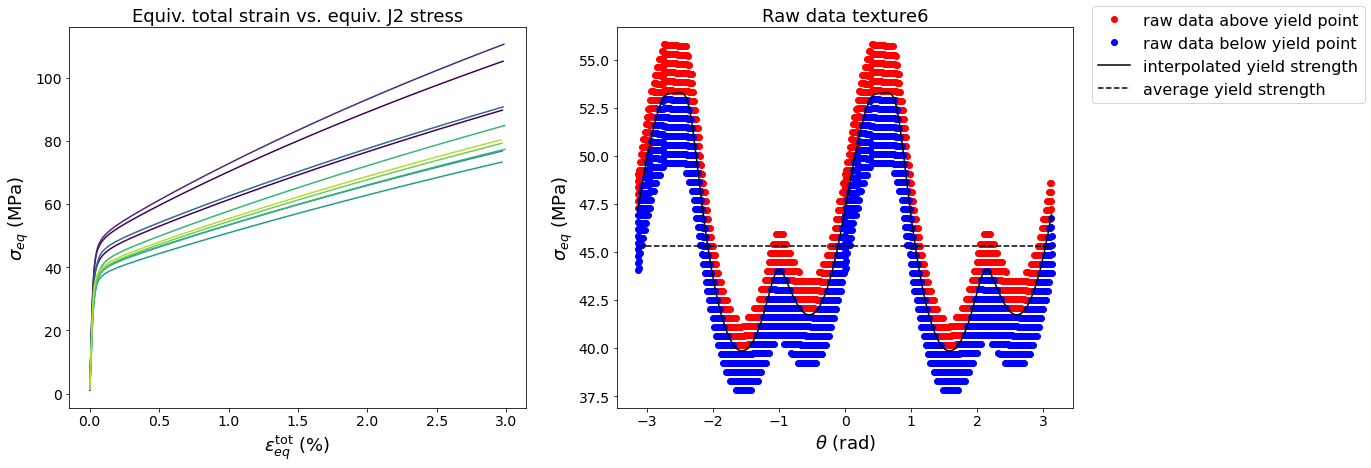


###   Data set "Goss"  ###
Type of microstructure:  Goss
Imported 1 data sets for textures, with 4 hardening stages and 358 load cases each.
Averaged properties : E_av=136.83 GPa, nu_av=0.30, sy_av=45.31 MPa
{'ms_type': 'Goss', 'Npl': 4, 'Nlc': 358, 'Ntext': 1, 'texture': array([1.]), 'tx_name': ['100%_Goss'], 'peeq_max': 0.026722268650652956, 'epc': 0.002, 'work_hard': array([0.002     , 0.01024076, 0.01848151, 0.02672227])}
***Shapes (40701, 6)

*** Microstructure: texture10 ***
40701  data points imported into database  Ori_19_11_298
Data for flow stresses at various plastic strains imported.
Texture  100%_Ori_19_11_298 with texture parameter:  1.0
Number of load cases:  359 ; initially:  3514
Estimated elasic constants: E=114.02 GPa, nu=0.30
Estimated yield strength: 38.92 MPa, from 3514 data sets with PEEQ approx. 0.002


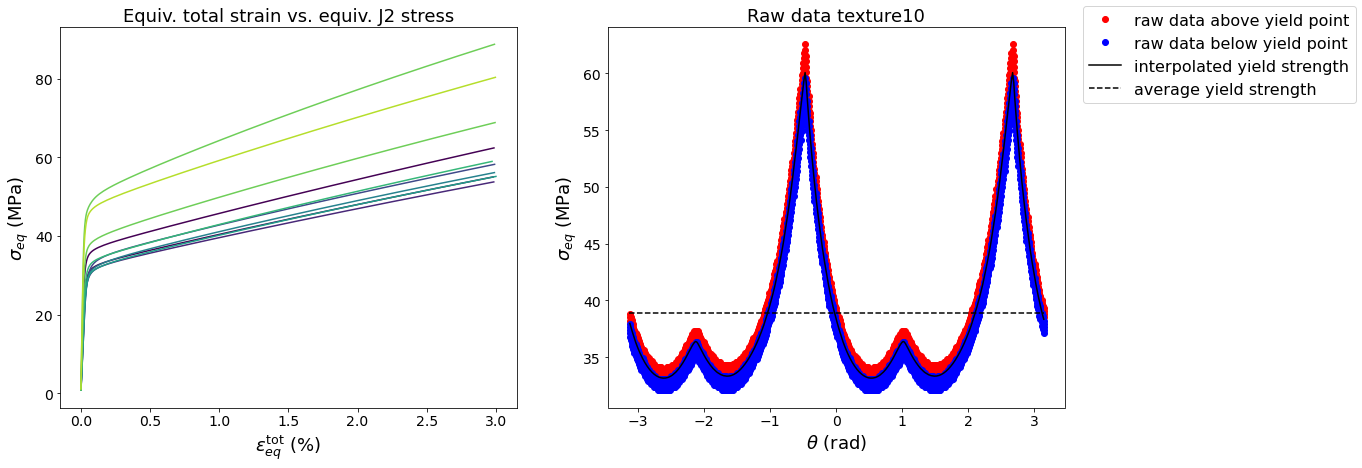


###   Data set "Ori_19_11_298"  ###
Type of microstructure:  Ori_19_11_298
Imported 1 data sets for textures, with 4 hardening stages and 358 load cases each.
Averaged properties : E_av=114.02 GPa, nu_av=0.30, sy_av=38.92 MPa
{'ms_type': 'Ori_19_11_298', 'Npl': 4, 'Nlc': 358, 'Ntext': 1, 'texture': array([1.]), 'tx_name': ['100%_Ori_19_11_298'], 'peeq_max': 0.026358665289292208, 'epc': 0.002, 'work_hard': array([0.002     , 0.01011956, 0.01823911, 0.02635867])}


In [1]:
import pylabfea as FE
import numpy as np
from scipy.optimize import fsolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

'set path truncs and open JSON file'
path_data='/Users/alexander/Data/ML-FlowRule/Data/'
path_json=path_data+'Metadata/'
'import data sets for random texture'
data_R = FE.Data(['texture5'], path_data, path_json=path_json, name="Random", epl_crit=0.002, d_ep=1.e-3, npe=4, plot=True)

'import data sets for Goss texture '
data_G = FE.Data(['texture6'], path_data, path_json=path_json, name="Goss", epl_crit=0.002, d_ep=1.e-3, npe=4, plot=True)
#data_G.set[0].plot_set(file='data_')

'import data sets for special texture Ori-19-11-298'
data_O = FE.Data(['texture10'], path_data, path_json=path_json, name="Ori_19_11_298", epl_crit=0.002, d_ep=1.e-3, npe=4, plot=True) 
dsets = [data_R, data_G, data_O]

### Plot filtered data defining the yield locus

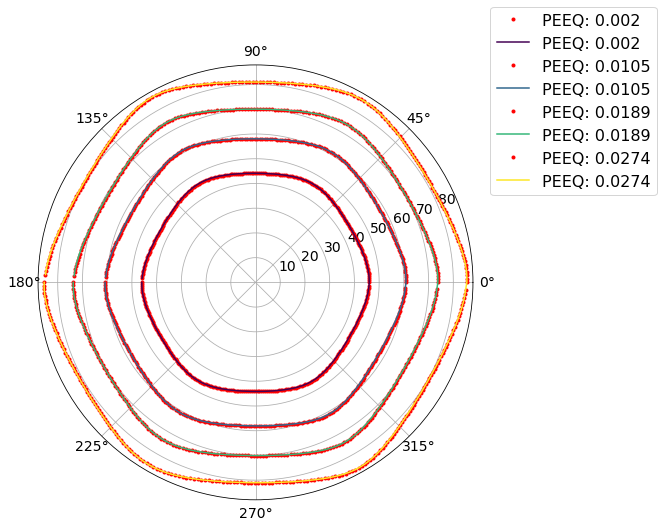

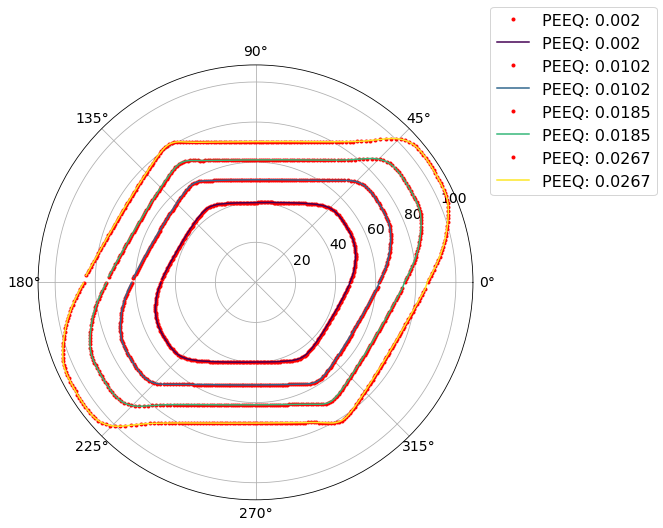

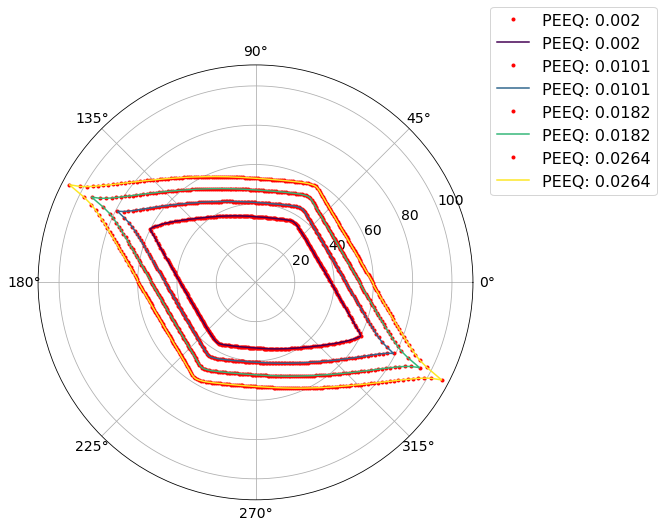

In [3]:
dsets = [data_R, data_G, data_O]
for data in dsets:
    #data.plot_yield_locus('texture', scatter=True)
    data.plot_yield_locus('work_hard', scatter=True)

## 2. Fit parameters for Hill and Barlat Yld2004-18p yield functions to data


***Fitting Hill yield function to data set texture5 of type Random
Starting values: x0= [44.073420373555074, 1.0, 1.0, 1.0] , Objective fct= 0.29163857292337225
Optimization terminated successfully.
Objective fct=  0.2896813829275394 @ x =  [44.17746828  1.01408591  1.0010958   0.99762403]

***Fitting Barlat Yld2004-18p yield function to data set texture5 of type Random
Starting values: x0= [26.81512331, 1.02021296, 0.92658352, 1.03136923, 1.07127137, 0.54151166, 0.73384814, 27.99803047, -8.95005073, 13.31430724, 0.82913875, 1.30607061, 1.05376112, 1.0719653, 1.13038488, 1.01274611, -83.59810355, -28.74225279, 80.46961104] , Objective fct= 0.10272591821790153
Optimization terminated successfully.
Objective fct=  0.10272591821790153 @ x =  [26.81512331, 1.02021296, 0.92658352, 1.03136923, 1.07127137, 0.54151166, 0.73384814, 27.99803047, -8.95005073, 13.31430724, 0.82913875, 1.30607061, 1.05376112, 1.0719653, 1.13038488, 1.01274611, -83.59810355, -28.74225279, 80.46961104]

Plot polar a

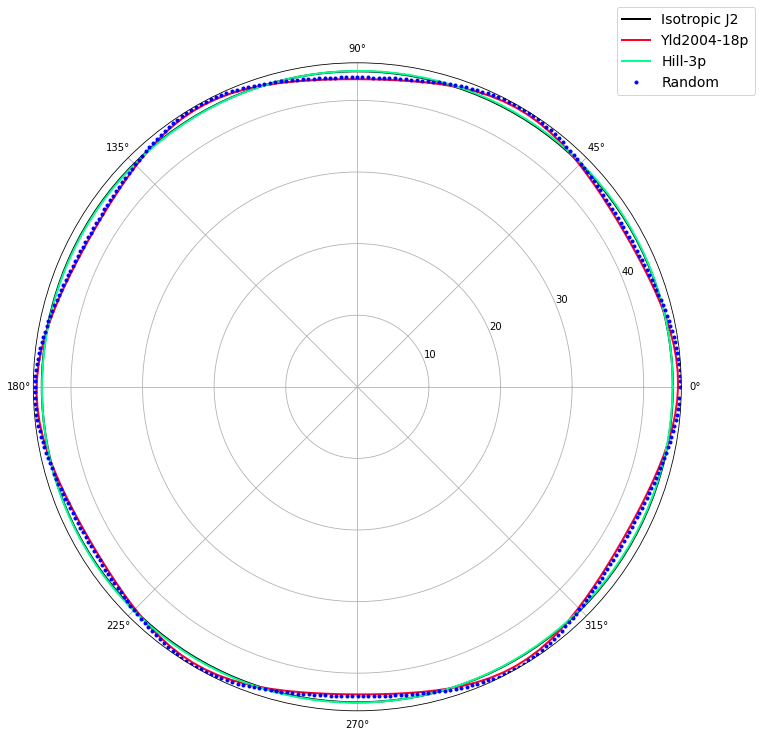


***Fitting Hill yield function to data set texture6 of type Goss
Starting values: x0= [44.414874271153714, 1.0, 1.0, 1.0] , Objective fct= 1.8820295019531121
Optimization terminated successfully.
Objective fct=  0.8381843592907314 @ x =  [44.39887808  1.19927474  1.3243581   0.52922733]

***Fitting Barlat Yld2004-18p yield function to data set texture6 of type Goss
Starting values: x0= [29.8242789, 1.46374987, 0.69169218, 0.92217204, 1.04627361, 0.66077183, 0.45495207, 1.73849091, 2.14008798, -6.07189077, 0.74094299, 0.9709336, 1.0415741, 0.4698808, 1.20231768, 1.58538819, 14.69177049, -11.72543639, 4.5903744] , Objective fct= 0.06642360431522129
Optimization terminated successfully.
Objective fct=  0.06642360431522129 @ x =  [29.8242789, 1.46374987, 0.69169218, 0.92217204, 1.04627361, 0.66077183, 0.45495207, 1.73849091, 2.14008798, -6.07189077, 0.74094299, 0.9709336, 1.0415741, 0.4698808, 1.20231768, 1.58538819, 14.69177049, -11.72543639, 4.5903744]

Plot polar angle vs. yield stress

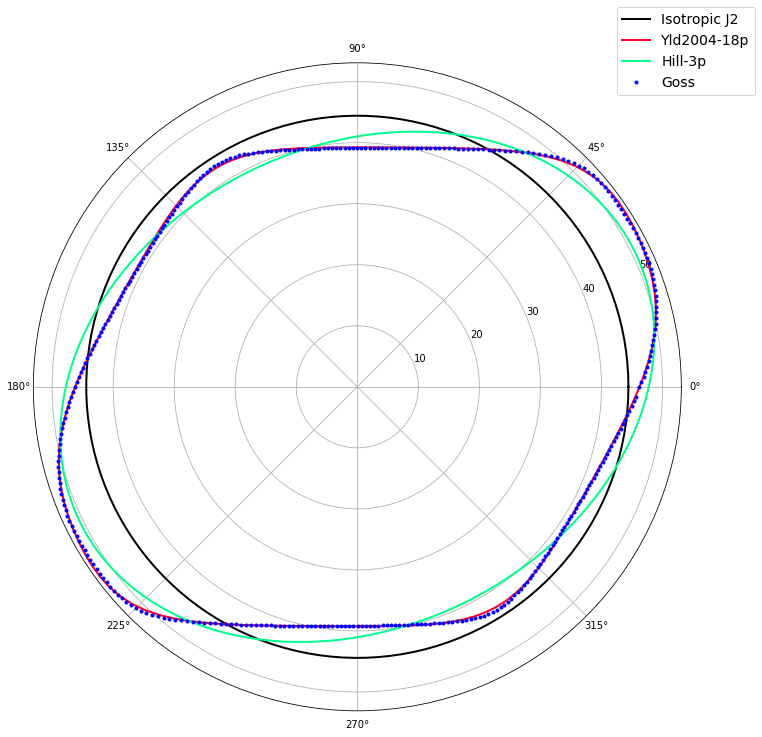


***Fitting Hill yield function to data set texture10 of type Ori_19_11_298
Starting values: x0= [38.522815237922195, 1.0, 1.0, 1.0] , Objective fct= 3.482594364760116
Optimization terminated successfully.
Objective fct=  1.5678609785086326 @ x =  [37.37912456  0.15913518  1.4184899   1.41027627]

***Fitting Barlat Yld2004-18p yield function to data set texture10 of type Ori_19_11_298
Starting values: x0= [36.80401254, 1.80861623, 0.96442881, 1.42484297, 0.86391281, 0.19415202, -1.04481668, 17.23736818, 105.07799197, -29.34791098, 0.26437078, 2.79539243, -0.29006477, 2.5606634, 1.454744, 2.00606885, -6.08029151, -9.8399627, -33.31587101] , Objective fct= 0.2022593722243858
Optimization terminated successfully.
Objective fct=  0.2022593722243858 @ x =  [36.80401254, 1.80861623, 0.96442881, 1.42484297, 0.86391281, 0.19415202, -1.04481668, 17.23736818, 105.07799197, -29.34791098, 0.26437078, 2.79539243, -0.29006477, 2.5606634, 1.454744, 2.00606885, -6.08029151, -9.8399627, -33.31587101]



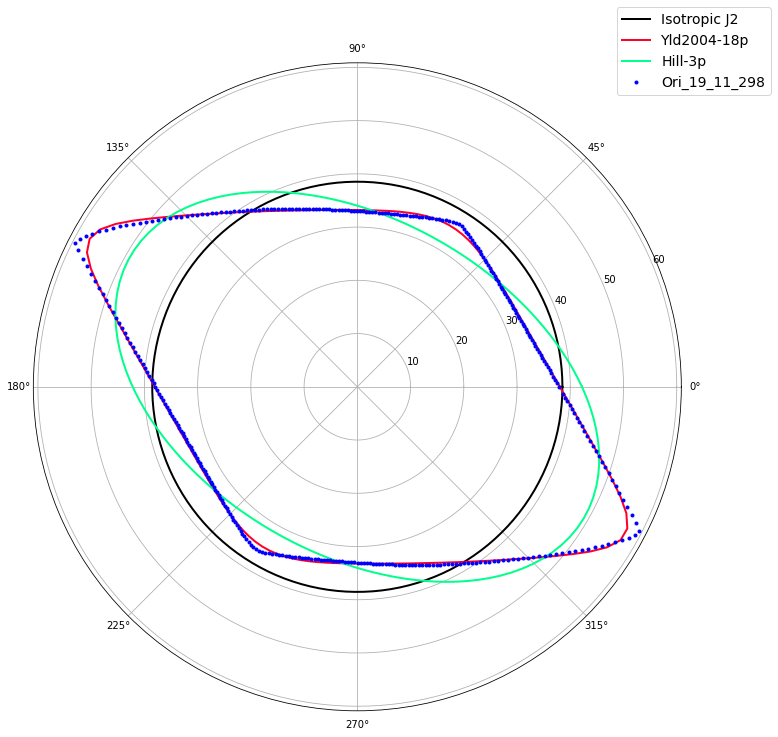

In [3]:
materials_Hill = []
materials_Barlat = []
materials_iso = []
Bar_a=8 #BCC:a=6, FCC:a=8, J2:a=2
for data in dsets:
    dset = data.set[0]
    mat_iso = FE.Material(name='Isotropic J2')
    mat_iso.elasticity(E=dset.E, nu=dset.nu)
    mat_iso.plasticity(sy=dset.sy)
    materials_iso.append(mat_iso)
    'objective fct for Hill yield fct'
    def dif_yfH(x):
        'Calculate square of differences between flow rule to data points'
        mat = FE.Material()
        mat.elasticity(E=dset.E, nu=dset.nu)
        mat.plasticity(sy=x[0],hill=x[1:4])
        d = np.linalg.norm(mat.calc_yf(FE.sp_cart(dset.syc)))/x[0]
        return d
    
    'objective fct for Barlat Yld2004-18p yield fct'
    def dif_yfB(x):
        'Calculate square of differences between flow rule to data points'
        mat = FE.Material()
        mat.elasticity(E=dset.E, nu=dset.nu)
        mat.plasticity(sy=x[0],barlat=x[1:19],barlat_exp=Bar_a)
        d = np.linalg.norm(mat.calc_yf(FE.sp_cart(dset.syc)))/x[0]
        return d
    
    'Fit Hill yield fct to data set'
    hill=[1., 1., 1.]
    x0 = [dset.sy, hill[0], hill[1], hill[2]]
    y0 = dif_yfH(x0)
    print('\n***Fitting Hill yield function to data set',dset.name,'of type',data.name)
    print('Starting values: x0=',x0,', Objective fct=',y0)
    res = minimize(dif_yfH, x0, method='Nelder-Mead')
    x = res.x
    print(res.message)
    print('Objective fct= ',dif_yfH(x), '@ x = ',x)
    'define material with optimized Hill parameters'
    mat_h = FE.Material(name='Hill-3p')
    mat_h.elasticity(E=dset.E, nu=dset.nu)
    mat_h.plasticity(sy=x[0], hill=x[1:4])
    materials_Hill.append(mat_h)
    
    'Fit Barlat Yld2004-18p yield fct to data set'
    #Bar=[1.241, 1.078, 1.216, 1.224, 1.093, 0.8892, 0.5019, 0.5572, 1.349, 
    #     0.7754, 0.9227, 0.7655, 0.7934, 0.9187, 1.028, 1.116, 1.112, 0.5898] # example from paper
    if data.name=='Random':
        x0 = [26.81512331, 1.02021296, 0.92658352, 1.03136923, 1.07127137, 0.54151166, 0.73384814, 27.99803047,  
              -8.95005073, 13.31430724, 0.82913875, 1.30607061, 1.05376112, 1.0719653, 1.13038488, 1.01274611,
              -83.59810355, -28.74225279, 80.46961104] # Random (O=0.012446413125081731)
    elif data.name=='Goss':
        x0 = [29.8242789, 1.46374987, 0.69169218, 0.92217204, 1.04627361, 0.66077183, 0.45495207, 1.73849091,
              2.14008798, -6.07189077, 0.74094299, 0.9709336, 1.0415741, 0.4698808, 1.20231768, 1.58538819,
              14.69177049, -11.72543639, 4.5903744]  # Goss (O=0.08292582851267791)
    elif data.name=='Ori_19_11_298':
        x0 = [ 36.80401254, 1.80861623, 0.96442881, 1.42484297,0.86391281, 0.19415202, -1.04481668, 17.23736818,
              105.07799197, -29.34791098, 0.26437078, 2.79539243, -0.29006477, 2.5606634, 1.454744, 2.00606885, 
              -6.08029151, -9.8399627, -33.31587101] # Ori (O=0.20225937230554555)
        '''Barlat parameters for taylor-type data Ori_19_11_298
              x0 = [35.55024446, 0.75481259, 1.62211031, 1.13621704, 0.72564173, 0.60963721, 1.10420839, 0.93915453,
              0.88809703, 0.38850386, 0.25020111, 0.24057569, 0.99965167, 1.83133325, 1.40345814, 0.64240235,
              0.75224714, 1.85384498, 1.0707036 ]  # Ori-19-11-298 (O=0.08292582851267791)'''
    else:
        Bar = np.ones(18)
        x0 = [dset.sy*0.6]
        x0.extend(Bar)
    y0 = dif_yfB(x0)
    print('\n***Fitting Barlat Yld2004-18p yield function to data set',dset.name,'of type',data.name)
    print('Starting values: x0=',x0,', Objective fct=',y0)
    res = minimize(dif_yfB, x0, method='Nelder-Mead')
    x = res.x
    print(res.message)
    print('Objective fct= ',dif_yfB(x), '@ x = ',x)
    'define material with optimized Barlat parameters'
    mat_b = FE.Material(name='Yld2004-18p')
    mat_b.elasticity(E=dset.E, nu=dset.nu)
    mat_b.plasticity(sy=x[0], barlat=x[1:19], barlat_exp=Bar_a)
    materials_Barlat.append(mat_b)

    print('\nPlot polar angle vs. yield stress for different yield functions together with data')
    mat_iso.polar_plot_yl(cmat=[mat_b, mat_h], data=dset.syc, dname=data.name, Na=144)#, scaling=mat_h.sy)


## 3. Train ML flow rule to different data sets


---------------------------

SVM classification training
---------------------------

19332 training data sets created from 1 microstructures, with 358 load cases each
Using cyclindrical stresses for training
SVC(C=17, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=3.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Training set score: 99.62166467542811 %
Plot ML yield loci with reference curve and test data


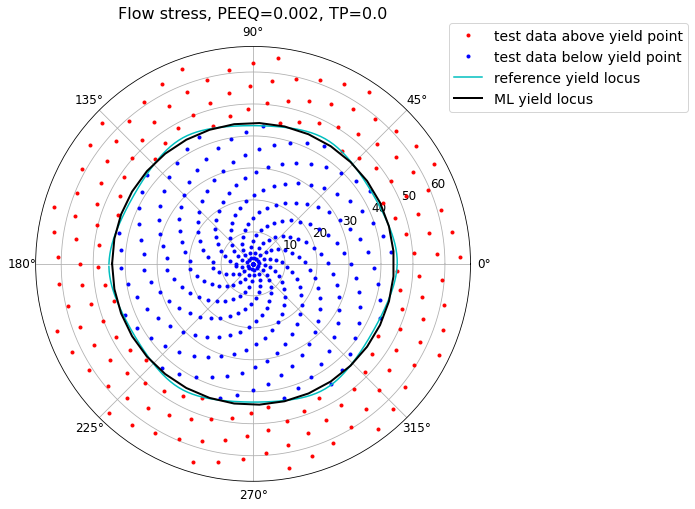


---------------------------

SVM classification training
---------------------------

19332 training data sets created from 1 microstructures, with 358 load cases each
Using cyclindrical stresses for training
SVC(C=17, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=3.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Training set score: 99.18582375478927 %
Plot ML yield loci with reference curve and test data


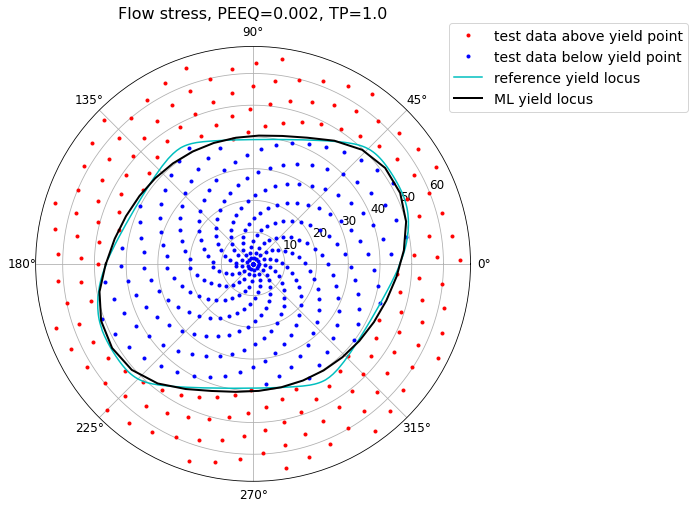


---------------------------

SVM classification training
---------------------------

19332 training data sets created from 1 microstructures, with 358 load cases each
Using cyclindrical stresses for training
SVC(C=17, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=3.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Training set score: 98.89127324749643 %
Plot ML yield loci with reference curve and test data


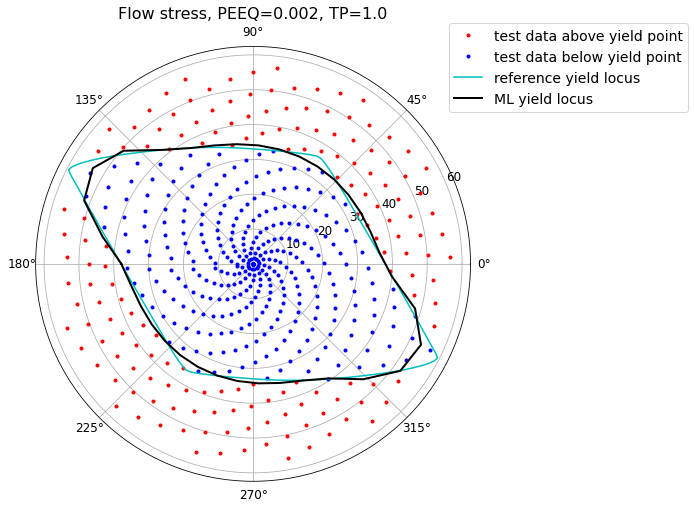

In [4]:
materials_ML = []
for data in dsets:
    'define material as basis for ML flow rule'
    mat_ml = FE.Material(name='ML-'+data.name)     # define material 
    mat_ml.elasticity(E=data.E_av, nu=data.nu_av)  # assign average properties to material
    mat_ml.plasticity(sy=data.sy_av)               # assessed from data
    mat_ml.microstructure(data.mat_param)          # define microstructural parameters for material
    'train SVC with data from all hardening levels is set'
    mat_ml.train_SVC(C=17, gamma=3., fs=0.3, plot=True)
    materials_ML.append(mat_ml)


## 4. Comparing analytical and ML yield functions

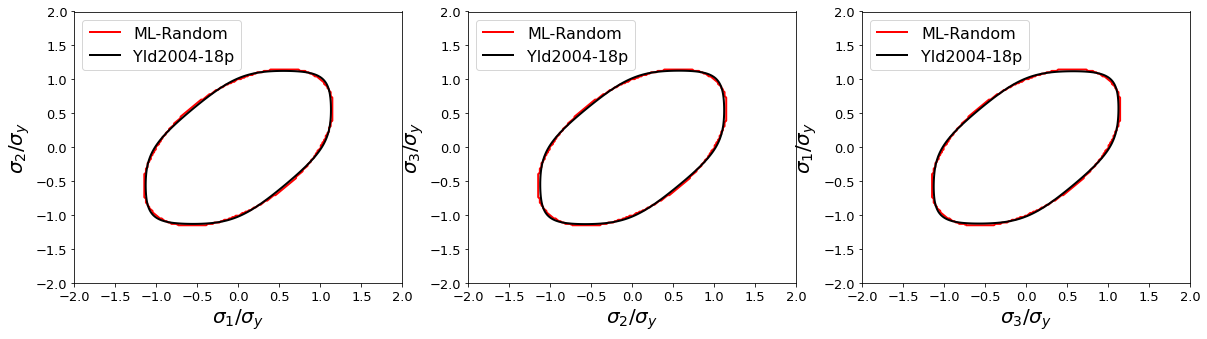

Polar plot of ML yield function, ML yield locus and data on deviatoric stress plane


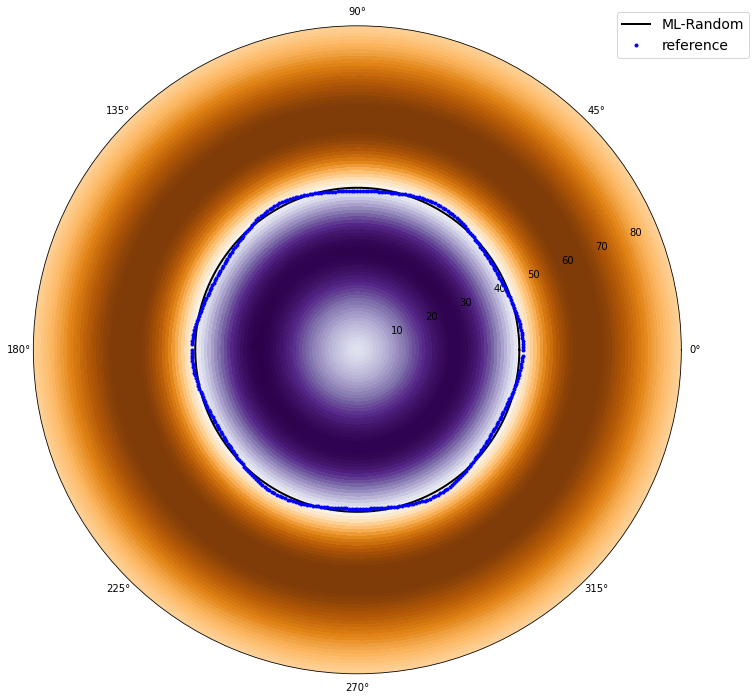

Polar plot of ML, Hill and Barlat yield loci and data on deviatoric stress plane


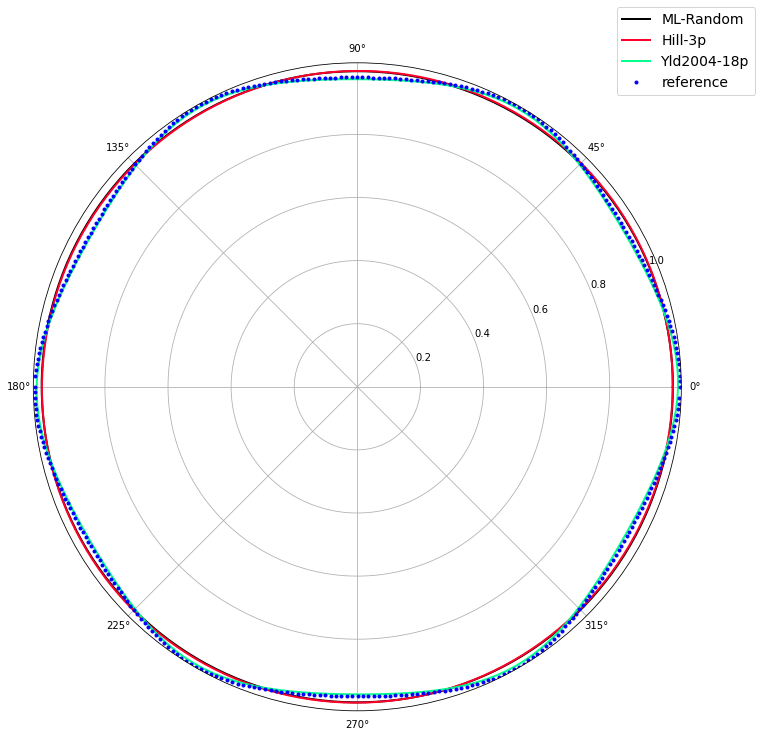

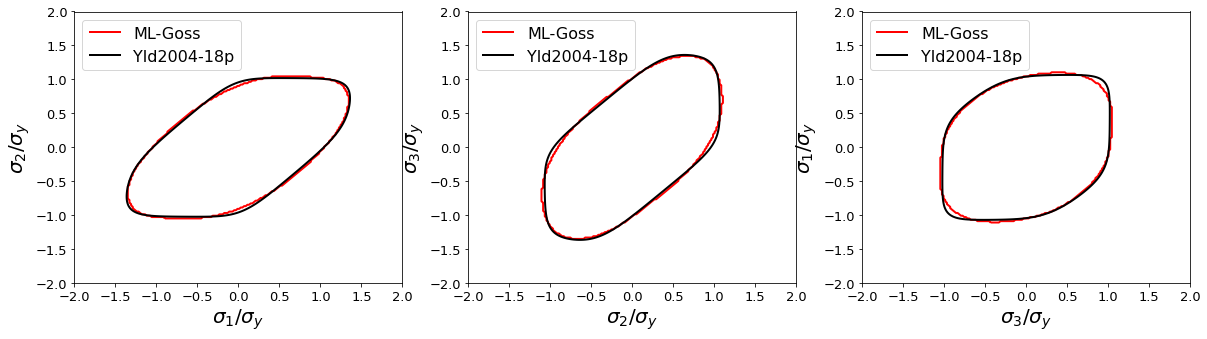

Polar plot of ML yield function, ML yield locus and data on deviatoric stress plane


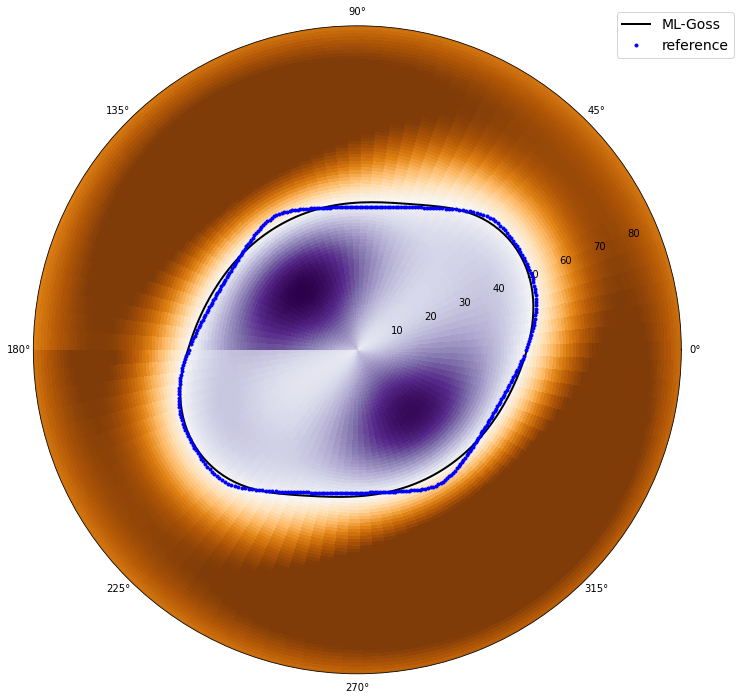

Polar plot of ML, Hill and Barlat yield loci and data on deviatoric stress plane


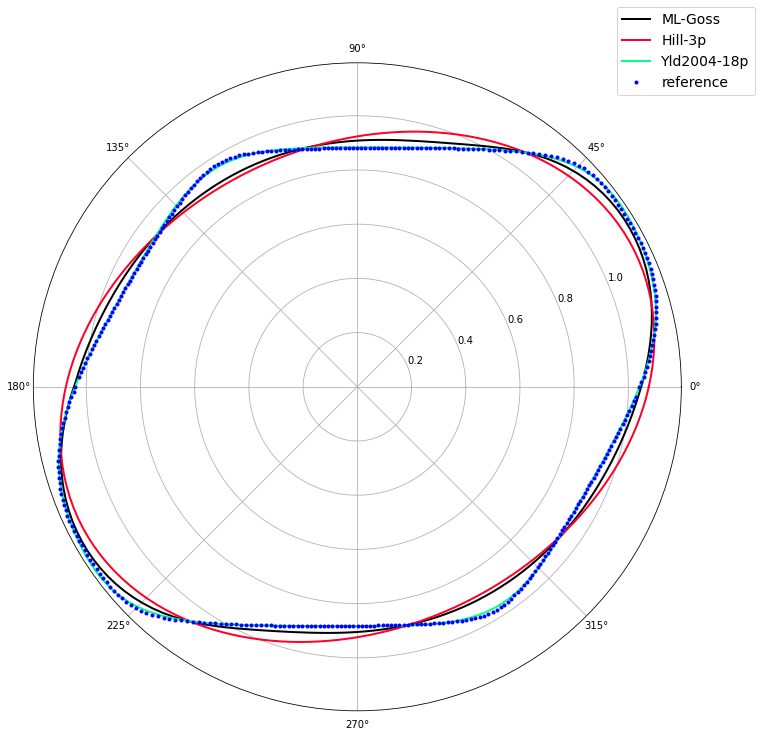

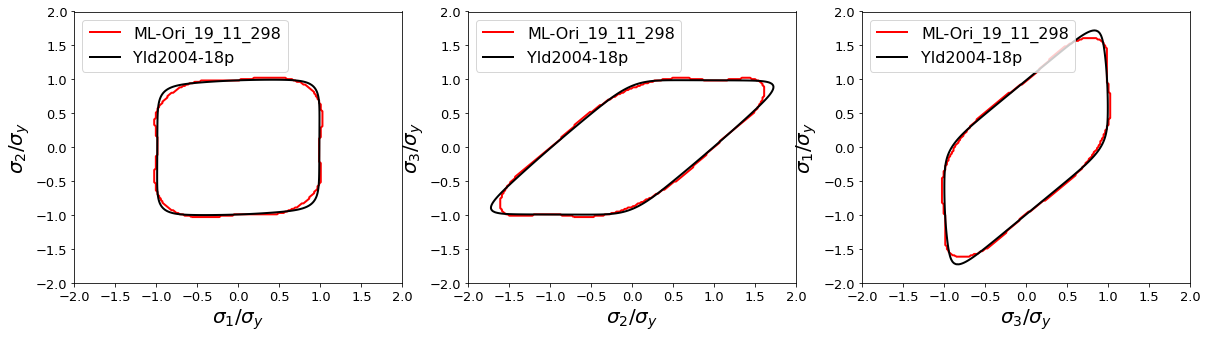

Polar plot of ML yield function, ML yield locus and data on deviatoric stress plane


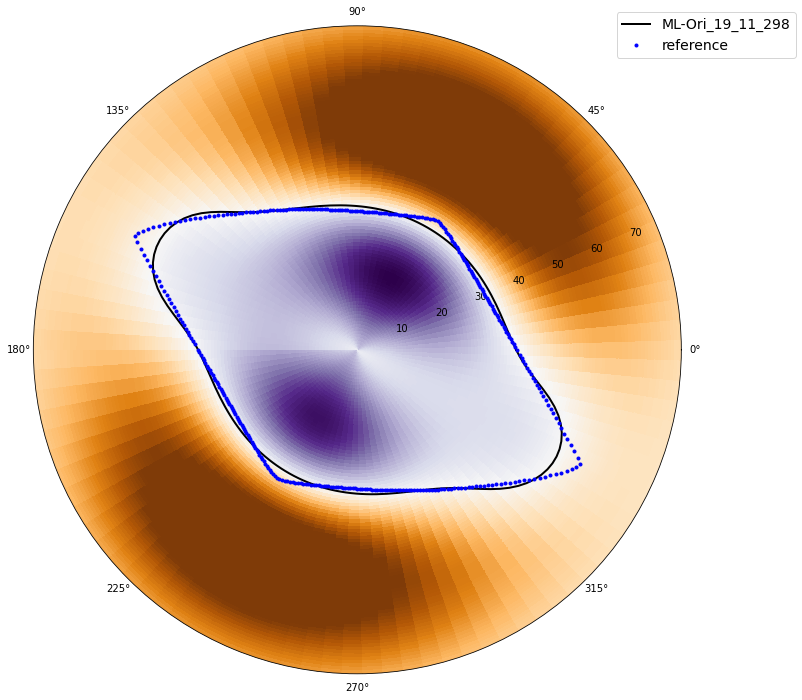

Polar plot of ML, Hill and Barlat yield loci and data on deviatoric stress plane


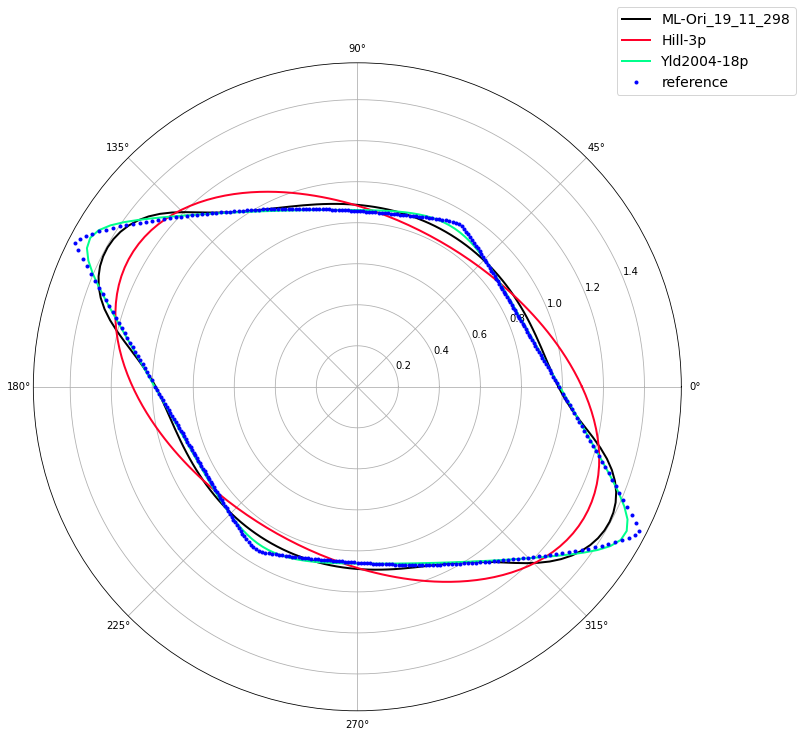

In [6]:
for i in range(3):
    mat_ml = materials_ML[i]
    mat_h = materials_Hill[i]
    mat_b = materials_Barlat[i]
    mat_ml.set_texture(1.)
    mat_ml.set_workhard(0.)
    sfl = mat_ml.msparam[0]['flow_stress'][0,0,:,:]
    mat_ml.plot_yield_locus(ref_mat=mat_b, Nmesh=200,
                      axis1=[0,1,2], axis2=[1,2,0], xstart=-2., xend=2.)
    #plt.savefig('comp_YL_all'+mat_ml.msparam[0]['ms_type']+'.pdf',format='pdf',dpi=300)
    plt.show()

    print('Polar plot of ML yield function, ML yield locus and data on deviatoric stress plane')
    mat_ml.polar_plot_yl(field=True, data=sfl, predict=False, Na=180, file='polar_ML_data-'+mat_ml.msparam[0]['ms_type'])
    print('Polar plot of ML, Hill and Barlat yield loci and data on deviatoric stress plane')
    mat_ml.polar_plot_yl(scaling=mat_ml.sy, data=sfl, cmat=[mat_h, mat_b], Na=180, file='polar_all-'+mat_ml.msparam[0]['ms_type'])



====== Stress-Strain-Curves ======
---------------------------------------------------------
J2 yield stress under uniax-x loading: 46.283 MPa
---------------------------------------------------------
J2 yield stress under uniax-y loading: 40.178 MPa
---------------------------------------------------------
J2 yield stress under equibiax loading: 45.059 MPa
---------------------------------------------------------
J2 yield stress under shear loading: 41.735 MPa
---------------------------------------------------------


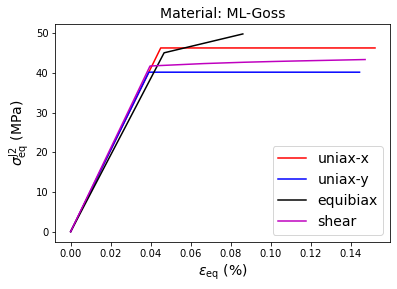

---------------------------------------------------------
J2 yield stress under uniax-x loading: 47.645 MPa
---------------------------------------------------------
J2 yield stress under uniax-y loading: 39.407 MPa
---------------------------------------------------------
J2 yield stress under equibiax loading: 46.019 MPa
---------------------------------------------------------
J2 yield stress under shear loading: 42.045 MPa
---------------------------------------------------------


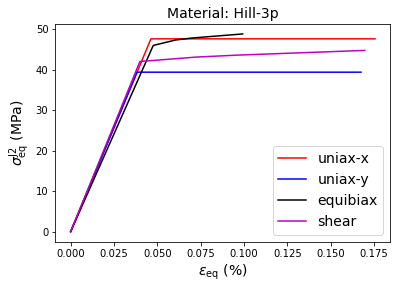

Plot evolution of stresses during plastic deformation for both material
Hill-material: blue colors
ML-material: yellow colors


<Figure size 432x288 with 0 Axes>

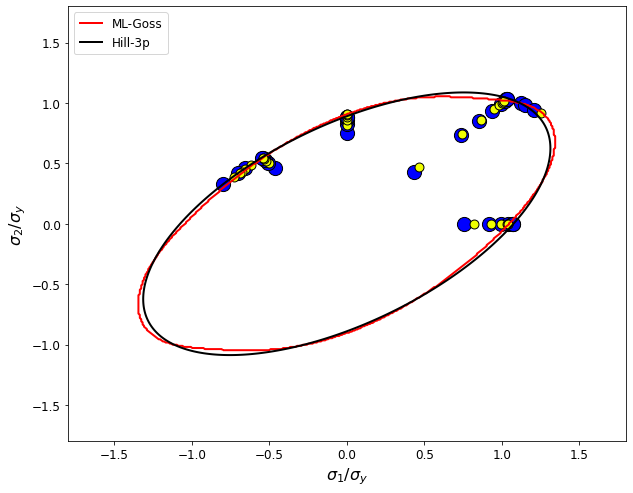

In [31]:
mat_ml = materials_ML[1] # example for Goss texture
mat_ref = materials_Hill[1] # Hill model as reference, Barlat gradient not implemented
print('\n\n====== Stress-Strain-Curves ======')
mat_ml.set_texture(1.)
mat_ml.set_workhard(0.)
mat_ml.calc_properties(verb=False, eps=0.0013, sigeps=True, min_step=4)
mat_ml.plot_stress_strain(file='sig-eps-Goss-ML')

mat_ref.calc_properties(eps=0.0015, sigeps=True, min_step=5)
mat_ref.plot_stress_strain(Hill=False, file='sig-eps-Goss-Hill')

'plot yield locus'
ax = mat_ml.plot_yield_locus(xstart=-1.8, xend=1.8, ref_mat=mat_ref, field=False, Nmesh=400)
print('Plot evolution of stresses during plastic deformation for both material')
print('Hill-material: blue colors')
print('ML-material: yellow colors')
s=80
'Hill material'
stx = mat_ref.sigeps['stx']['sig'][:,0:2]/mat_ref.sy
sty = mat_ref.sigeps['sty']['sig'][:,0:2]/mat_ref.sy
et2 = mat_ref.sigeps['et2']['sig'][:,0:2]/mat_ref.sy
ect = mat_ref.sigeps['ect']['sig'][:,0:2]/mat_ref.sy
ax.scatter(stx[1:,0],stx[1:,1],s=s*2.5, c='#0000ff', edgecolors='k')
ax.scatter(sty[1:,0],sty[1:,1],s=s*2.5, c='#0000ff', edgecolors='k')
ax.scatter(et2[1:,0],et2[1:,1],s=s*2.5, c='#0000ff', edgecolors='k')
ax.scatter(ect[1:,0],ect[1:,1],s=s*2.5, c='#0000ff', edgecolors='k')

'ML material'
stx = mat_ml.sigeps['stx']['sig'][:,0:2]/mat_ml.sy
sty = mat_ml.sigeps['sty']['sig'][:,0:2]/mat_ml.sy
et2 = mat_ml.sigeps['et2']['sig'][:,0:2]/mat_ml.sy
ect = mat_ml.sigeps['ect']['sig'][:,0:2]/mat_ml.sy
ax.scatter(stx[1:,0],stx[1:,1],s=s, c='#f0ff00', edgecolors='k')
ax.scatter(sty[1:,0],sty[1:,1],s=s, c='#f0ff00', edgecolors='k')
ax.scatter(et2[1:,0],et2[1:,1],s=s, c='#f0ff00', edgecolors='k')
ax.scatter(ect[1:,0],ect[1:,1],s=s, c='#f0ff00', edgecolors='k')
plt.savefig('deform-Goss-YL.pdf',format='pdf',dpi=300)
plt.show()

[0.0002 0.0011 0.002 ] [24.56652944 47.15265221 47.2219443 ] [0.         0.0007488  0.00165502]


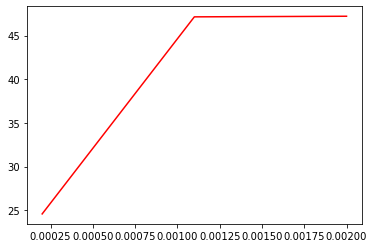

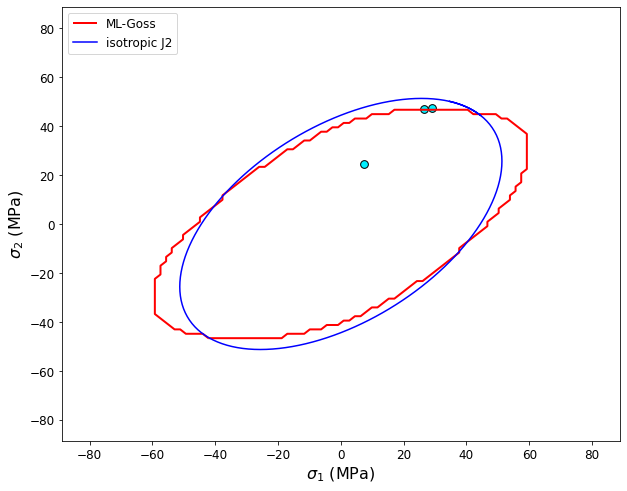

In [35]:
fem = FE.Model(dim=2, planestress=True)   # call class to generate object for finite element model
fem.geom([1], LY=1.)   
fem.assign([mat_ml]) 
fem.bcleft(0.)                    
fem.bcbot(0.)
fem.mesh(NX=2, NY=2)
eps_list=np.linspace(0.0002,0.002,3)
eps = []
sig = []
epl = []
for et in eps_list:
    fem.bctop(et, 'disp')
    fem.bcright(0, 'disp') 
    fem.solve()      
    eps.append(fem.glob['eps'])
    sig.append(fem.glob['sig'])
    epl.append(fem.glob['epl'])
eps = np.array(eps)
sig = np.array(sig)
epl = np.array(epl)
print(eps[:,1],sig[:,1],epl[:,1])
plt.plot(eps[:,1],sig[:,1],'-r')
ax = mat_ml.plot_yield_locus(iso=True, scaling=False)
for sv in sig:
    sp = FE.Stress(sv).p
    ax.scatter(sp[0],sp[1],s=60, c='#00f0ff', edgecolors='k')